# 非線形
- ※多項式特徴量はlinear_modelのひとつ

## 多項式特徴量
- 馬力からmpgを予測

In [11]:
import seaborn as sns
df = sns.load_dataset('mpg') #mile per galon
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1,1)
y = df['mpg']

In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


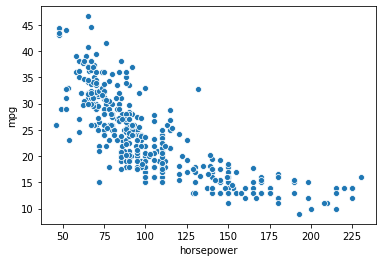

In [4]:
sns.scatterplot(x = df['horsepower'], y = df['mpg'])

In [12]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures



# 引数degreeeの値は、X^nをどこまで項を作るか
## 多くても3が一般的
## 第2引数のinclude_biasをTrueにするか否かでバイアス項の有無
## どっちでも問題なし（LinearRegressionがよしなにやってくれてる）
poly =  PolynomialFeatures(2)
poly.fit(X)
poly.transform(X)

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

- 上で示してるのがそれぞれバイアス項の係数、Xの係数、X^2の係数

In [14]:
X_poly = poly.transform(X)
# 線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#描画
import numpy as np
import matplotlib.pyplot as plt

x_axis = np.arange(50,230).reshape(-1,1)
x_axis_ = poly.fit_transform(x_axis)
pred = model.predict(x_axis_)

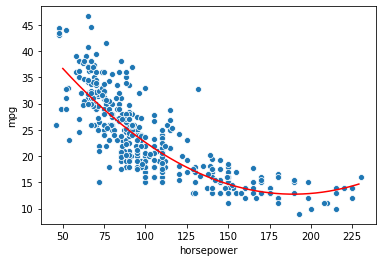

In [25]:
sns.scatterplot(x = df['horsepower'], y = df['mpg'])
plt.plot(x_axis, pred, 'r')

- 本来であれば、hold-outやKFoldを行った上で上のような学習を行う

# 多項式回帰と線形回帰の精度を比較
- 多項式回帰のdegree=1 ==> 線形回帰と同じ

In [26]:
# 線形回帰 vs 非線形

In [27]:
X = df['horsepower'].values.reshape(-1,1)
y = df['mpg']

In [29]:
degrees = [1,2,3]

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = LinearRegression()
k =5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state = 0)
results = {}
for d in degrees:
    poly = PolynomialFeatures(d)
    X_poly = poly.fit_transform(X)
    scores = cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error',cv = cv)
    results[f"degree{d}"] = {'scores_mean': -np.mean(scores), 'scores_std':np.std(scores)}

In [39]:
results

{'degree1': {'scores_mean': 24.235391801372007,
  'scores_std': 3.346677774172965},
 'degree2': {'scores_mean': 19.294969517171612,
  'scores_std': 4.413627004206314},
 'degree3': {'scores_mean': 19.43381169296057,
  'scores_std': 4.508223822988694}}

In [40]:
import pandas as pd
pd.DataFrame(results)


,degree1,degree2,degree3
scores_mean,24.235392,19.294970,19.433812
scores_std,3.346678,4.413627,4.508224


# kNN回帰

In [41]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.9, random_state=0)

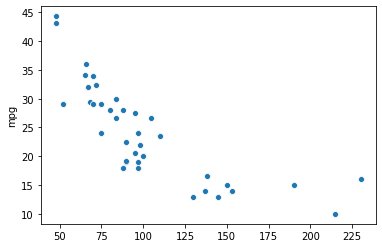

In [49]:
sns.scatterplot(X_train[:,0],y_train)

In [51]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

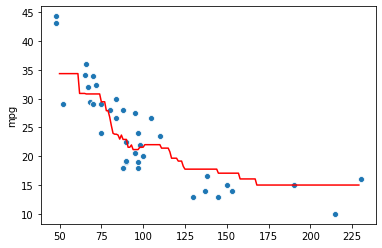

In [54]:
x_axis = np.arange(50,230).reshape(-1,1)
y_pred = model.predict(x_axis)
sns.scatterplot(X_train[:,0],y_train)
plt.plot(x_axis, y_pred, 'r')